In [1]:
import os
import pandas as pd
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
%matplotlib inline

path = 'data/ESI Objektivblende'
blenden = np.array((10, 20, 30, 40, 50, 60, 80))
flaeche = np.pi * (0.5 * blenden)**2

data = {}
for file in os.listdir(path):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(path, file))
        df.Yn = df.Y0 / df.Y0.max()
        df.X0 = blenden
        df.A = flaeche
        data[file.split('.')[0]] = df
        
data.keys()

dict_keys(['Eisen4', 'Chrom5', 'Chrom1', 'Si', 'Eisen3', 'Chrom', 'Chrom2', 'Eisen2', 'Chrom4', 'Chrom3', 'Eisen5', 'SiO'])

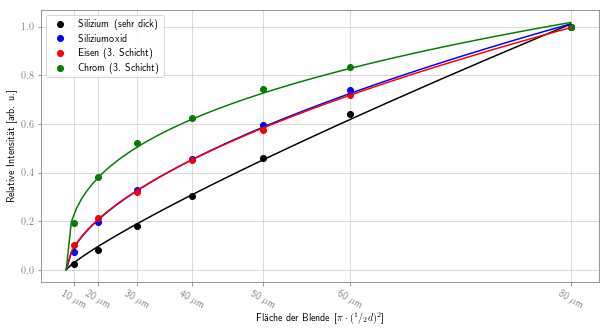

In [2]:
func = lambda x, m, b:  m * x**b

def plot_key(key, color, label=''):
    xs = data[key].A
    ys = data[key].Yn
    popt, pconv = scipy.optimize.curve_fit(func, xs, ys, (1, 0.5))
    plt.scatter(xs, ys, label=label, c=color)
    x_fit = np.linspace(0, xs.max(), 100)
    plt.plot(x_fit, func(x_fit, *popt), color=color)

plt.figure(figsize=(10,5))
plot_key('Si', 'k', 'Silizium (sehr dick)')
plot_key('SiO', 'b', 'Siliziumoxid')
plot_key('Eisen3', 'r', 'Eisen (3. Schicht)')
plot_key('Chrom3', 'g', 'Chrom (3. Schicht)')
plt.xlabel('Fläche der Blende [$\pi\cdot(^1/_2 d)^2$]')
plt.xticks(flaeche, ['%d µm' % d for d in blenden], rotation=-30)
plt.ylabel('Relative Intensität [arb. u.]')
#plt.yscale('log')
plt.legend(loc='best')
plt.savefig('Bilder/ESI_Objektivblende.pdf')
plt.show()

In [3]:
data['Si']

,X0,Y0
0,10,265.583
1,20,935.928
2,30,2053.751
3,40,3468.386
4,50,5295.469
5,60,7366.878
6,80,11506.368
